In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fft import fft, fftfreq, fftshift

## Problem 1: Integration of SIR Model

Creating integrator 

Text(0.5, 0, 'Time')

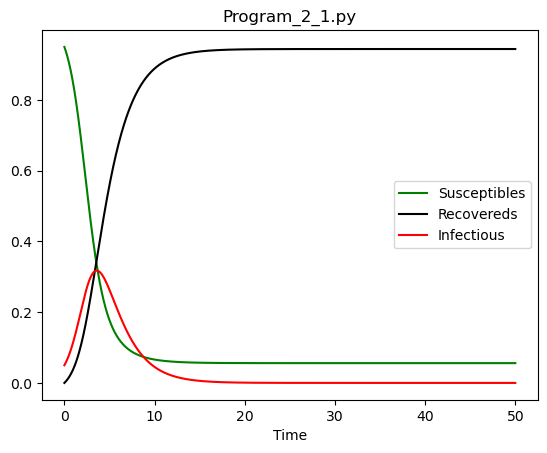

In [258]:
gamma=0.5
beta= gamma * 3
R0 = beta/gamma
TS=1.0
ND=70.0
I0=0.05
S0=1-I0

# Defining system of equations
X=np.zeros(3) 
X[0] = - beta * X[0] * X[1]   #dS
X[1] = beta * X[0] * X[1] - gamma * X[1]   # dI
X[2] = gamma * X[1]    # dR

R0 = beta/gamma
TS=1.0
ND=70.0
I0=0.05
S0=1-I0
dt = 0.1
recovered = 0

time = np.arange(0, 50, 0.01)
initial = [S0, I0, 0]

def integrate(system, initial_conditions, t):
    solution = odeint(system, initial_conditions, t)
    return solution

def diff_eqs(values,t):   
    X = np.zeros(3) 
    X[0] = - beta * values[0] * values[1]   #dS
    X[1] = beta * values[0] * values[1] - gamma * values[1]   # dI
    X[2] = gamma * values[1]    # dR
    return X   # For odeint


RES = odeint(diff_eqs, initial, time)
plt.plot(time,RES[:,0], '-g', label='Susceptibles')
plt.plot(time,RES[:,2], '-k', label='Recovereds')
plt.plot(time,RES[:,1], '-r', label='Infectious')
plt.legend(loc=0)
plt.title('Program_2_1.py')
plt.xlabel('Time')

In [259]:
def phase_plot(x_list,y_list):
    for k in range(len(s_list)):
        I0 = y_list[k]
        S0 = x_list[k]
        initial = [S0, I0, 0]
        RES = odeint(diff_eqs, initial, time)
        x = RES[:, 0]
        y = RES[:, 1]
        plt.plot(x,y, '-c')
        
    plt.scatter(x_list, y_list, marker = '.', color = 'b')
    plt.plot(x_list, y_list,'0.5')
    plt.xlim(0,1)
    plt.ylim(0,1)
    
dx = 0.05
s_list = np.arange(0,1+dx, dx)
i_list = s_list[::-1]
gamma=0.5

Calculating phase diagram for both cases

### Case A: No epidemic

R0 = 3.0


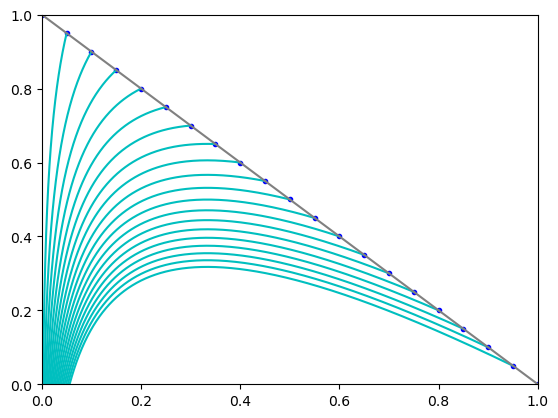

In [260]:
beta= gamma * 3
R0 = beta/gamma
print(f"R0 = {R0}")
phase_plot(i_list,s_list)

### Case B: Epidemic

R0 = 0.8


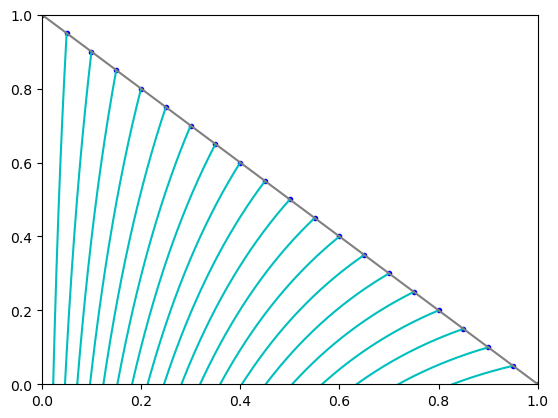

In [261]:
beta= gamma * 0.8
R0 = beta/gamma
print(f"R0 = {R0}")

phase_plot(i_list,s_list)

## Problem 1.2: Demography

In [262]:
from scipy.optimize import curve_fit

In [263]:
def diff_eqs2(values,t, gamma, beta):   
    X = np.zeros(3) 
    X[0] = - beta * values[0] * values[1]   #dS
    X[1] = beta * values[0] * values[1] - gamma * values[1]   # dI
    X[2] = gamma * values[1]    # dR
    return X   # For odeint

def cool_integration(time, gamma, beta):
    N = 763
    IO = 1/763
    SO = 1-IO
    initial = [SO, IO, 0]
    RES = odeint(diff_eqs2, initial, time, args = (gamma, beta))
    infected = RES[:, 1]
    return infected



[0.44760972 1.66511383]


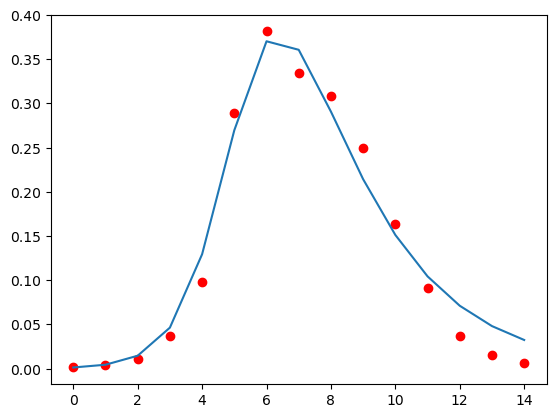

In [264]:
N = 763

# Data given from question
x_data = np.array([x for x in range(0,15)])
y_data = np.array([1,3,8,28,75,221,291,255,235,190,125,70,28,12,5])/N

IO = 1/763
SO = 1-IO
initial = [SO, IO, 0]

# Fit the function to the data
params, covariance = curve_fit(cool_integration, x_data, y_data)
print(params)
# Parameters 'beta' and 'gamma' are stored in 'params'
# best_fit_beta, best_fit_gammcca = params

model = odeint(diff_eqs2, initial, x_data, args = (params[0], params[1]))[:,1]
plt.plot(x_data, model)
plt.scatter(x_data,y_data,color= 'r')

## Problem 2 Demography

### 1. Adding birth and death rate

In [270]:
mu = 0.01

def SIR_2(t, initial, gamma, beta, mu):   
    Y = np.zeros(3) 
    Y[0] = mu - beta * initial[0] * initial[1] - mu * initial[0]
    Y[1] = beta * initial[0] * inital[1] - gamma * initial[1] - mu * initial[1]
    Y[2] = gamma * inital[1] - mu * initial[2]
    return Y   


RES = odeint(SIR_2, initial, time, args = (gamma, beta, mu))

#Ploting
plt.plot(time,RES[:,0], '-g', label='Susceptibles')
plt.plot(time,RES[:,2], '-k', label='Recovereds')
plt.plot(time,RES[:,1], '-r', label='Infectious')
plt.legend(loc=0)
plt.title('Program_2_1.py')
plt.xlabel('Time')

[0.9986893840104849, 0.001310615989515072, 0]


TypeError: 'float' object is not subscriptable

In [252]:
og = tuple([p for p in range(1,4)])
print(type(og))
print(og)

<class 'tuple'>
(1, 2, 3)


## Problem 3: Variants of the SIR model